# **Mini-Project 2: Building a Classification Model with Scikit-learn**

**Objective:**

The objective of this project is to build a binary classification model using Scikit-learn, evaluate its performance, and compare at least two models. We will use a dataset, preprocess it, train the models, and analyze their performance.

# **1. Dataset**

We'll use the Breast Cancer dataset, a built-in dataset from Scikit-learn. This dataset is suitable for binary classification since the target variable has two classes: 0 (no cancer) and 1 (cancer).

The Breast Cancer Wisconsin (Diagnostic) Dataset is widely used in machine learning for binary classification tasks. It contains data from breast cancer patients, and the goal is to predict whether a tumor is malignant (cancerous) or benign (non-cancerous) based on various features derived from a biopsy.

**Key Details:**

Source: University of Wisconsin Hospitals (Madison) by Dr. William H. Wolberg.

Objective: Binary classification of breast tumors (malignant or benign).

Number of samples: 569 patients.

Number of features: 30 numeric features.

**Features:**

The features describe characteristics of cell nuclei present in digitized images of breast tissue. These include:

-Radius (mean of distances from center to points on perimeter)

-Texture (standard deviation of gray-scale values)

-Perimeter

-Area

-Smoothness (local variation in radius lengths)

-Compactness (perimeter² / area - 1)

-Concavity (severity of concave portions)

-Concave points (number of concave portions)

-Symmetry

-Fractal dimension (coastline approximation)

**Target:**

-> 0 = Benign (non-cancerous).

-> 1 = Malignant (cancerous).

**Dataset Format:**

-> 569 rows and 31 columns (30 features + 1 target).

-> No missing values.


# **2. Loading the Dataset**


First, we'll load the dataset into a pandas DataFrame so that we can easily manipulate and explore the data.

In [15]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.to_csv('breast_cancer.csv', index=False)

# Display the first 5 rows of the data
df.head()

#This code loads the breast cancer dataset, adds the target column, and displays the first 5 rows to get an idea of what the data looks like.


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# **3. Data Preprocessing**

**3.1 Checking for Missing Values**

It's important to check if any data is missing before proceeding.

In [16]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


**3.2 Encoding Categorical Variables**

Since this dataset doesn't contain any categorical variables, we can skip this step. If your dataset has categorical variables, you can use pd.get_dummies to encode them into numerical values.

**3.3 Feature Scaling**

For many machine learning algorithms, it’s essential to scale the features so they’re all on the same scale.

The Below code scales the features, ensuring that all columns have a similar range of values, which can improve model performance.

In [17]:
#3.3 Feature Scaling
from sklearn.preprocessing import StandardScaler

# Scale the feature columns
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('target', axis=1))
y = df['target']


# **4. Splitting the Data**


We’ll split the dataset into training (80%) and testing (20%) sets. This allows us to train the model on one part of the data and evaluate it on another.

In [18]:
#4. Splitting the Data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **5. Model Selection**

We’ll train two different models and compare their performance: Logistic Regression and Random Forest.


In [19]:
#5.1 Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [20]:
#5.2 Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_clf = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# **6. Model Evaluation**


We will evaluate both models using the following metrics:

Accuracy: How often the model makes correct predictions.
Precision: Of the predicted positive results, how many are actually positive?
Recall: Of the actual positive results, how many did the model identify?
F1-Score: A balance between precision and recall.
ROC AUC: Measures the ability of the model to distinguish between the two classes.

In [21]:
#6.1 Logistic Regression Performance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_log_reg):.4f}")


Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1-Score: 0.9790
ROC AUC: 0.9697


In [22]:
#6.2 Random Forest Performance

# Make predictions
y_pred_rf_clf = rf_clf.predict(X_test)

# Evaluate the Random Forest model
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_clf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_clf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_clf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_clf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_rf_clf):.4f}")


Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-Score: 0.9722
ROC AUC: 0.9581


# **Visualizing the Results**

To better understand the performance of the models,let's visualize the ROC curve and confusion matrix for both models.

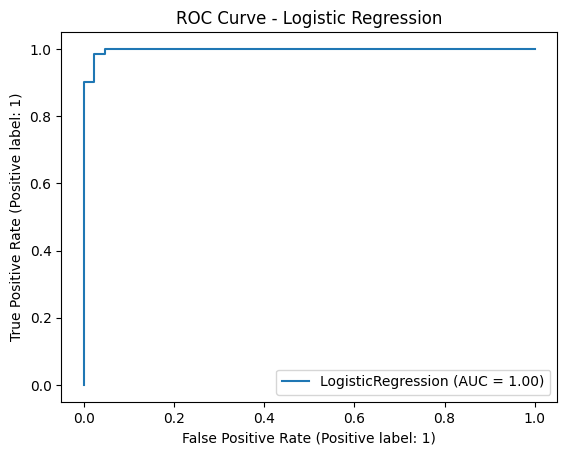

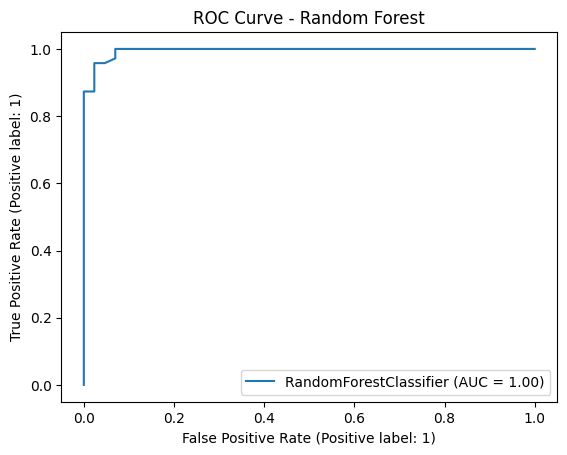

In [23]:
#ROC Curve

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot ROC curve for Logistic Regression
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title('ROC Curve - Logistic Regression')
plt.show()

# Plot ROC curve for Random Forest
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)
plt.title('ROC Curve - Random Forest')
plt.show()


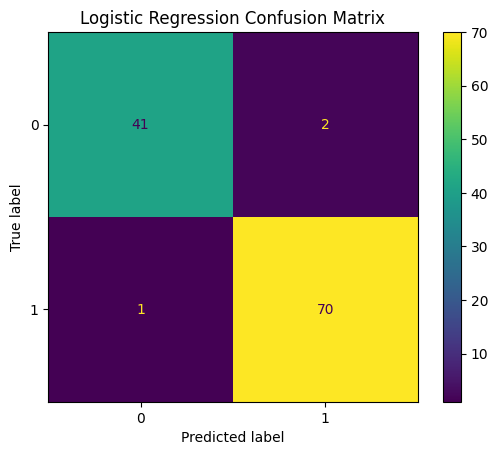

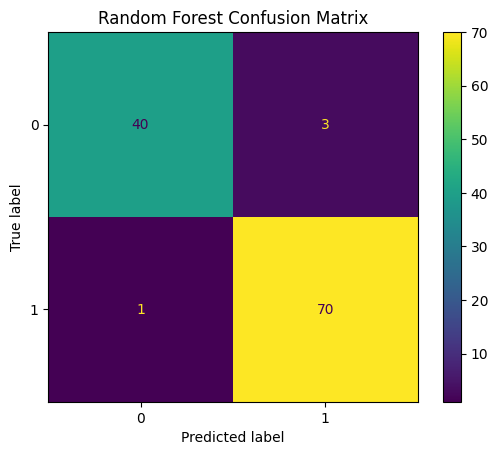

In [24]:
#Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()


# **7. Cross-Validation and Hyperparameter Tuning**

You can use GridSearchCV to improve the model's performance by finding the best hyperparameters.

In [25]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Accuracy Scores: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Mean CV Accuracy: 0.9561


In [26]:
#Using GridSearchCV

from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearch for hyperparameter tuning
grid_search = GridSearchCV(rf_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


**Feature Importance**

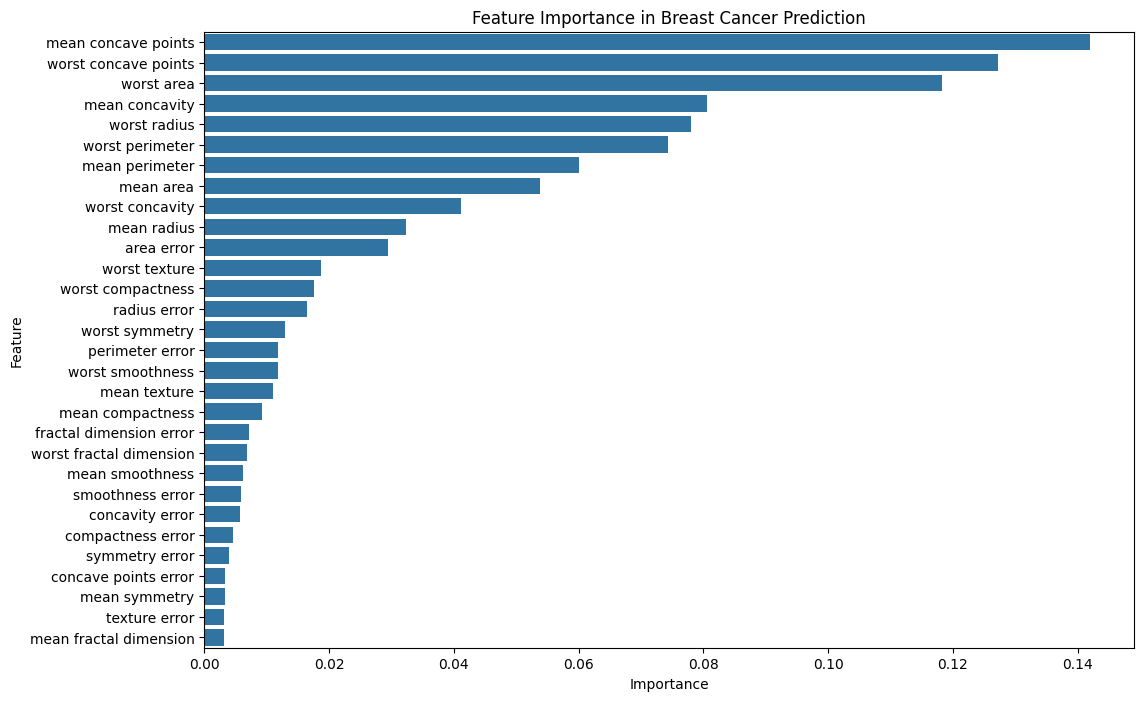

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Breast Cancer Prediction')
plt.show()


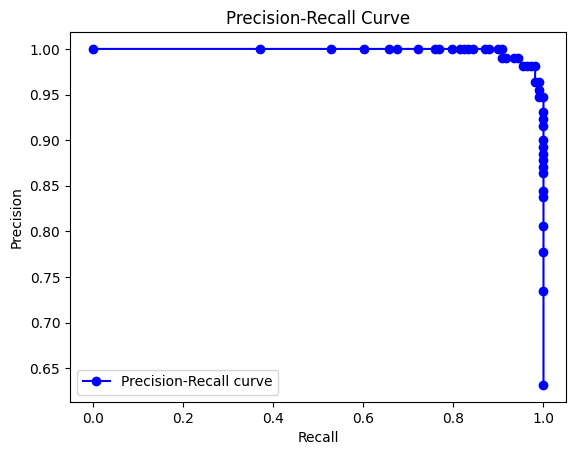

In [29]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #Import RandomForestClassifier
from sklearn.model_selection import train_test_split #Import train_test_split
import pandas as pd #Import pandas
from sklearn.datasets import load_breast_cancer #Import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1] # Calculate predicted probabilities

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot PR curve
plt.figure()
plt.plot(recall, precision, marker='o', color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

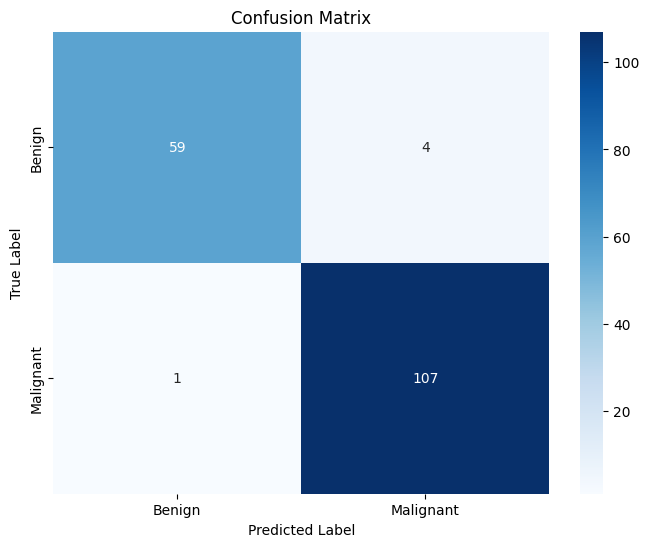

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=
'Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
